In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [6]:
import plotly.express as px



In [7]:
fig = px.scatter_3d(df, x='RND', y='ADMIN', z='PROFIT')

fig.show()
     

In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
X=df[["RND","ADMIN","MKT"]]
Y=df[["PROFIT"]]

In [11]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [14]:
model.intercept_

array([50122.19298987])

In [15]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [16]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [17]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'Coefficent of Linear Reg'}>

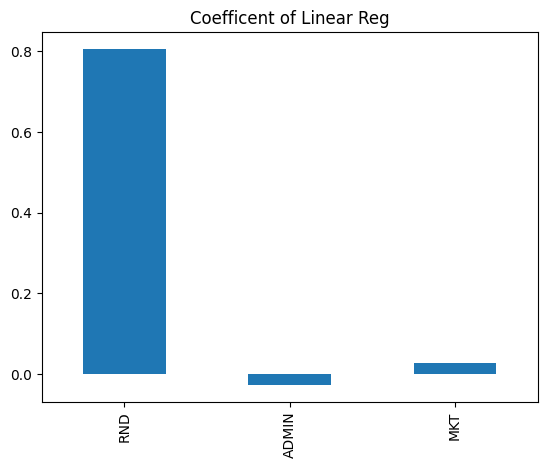

In [18]:
coef.plot(kind='bar', title='Coefficent of Linear Reg')

In [19]:
model.score(X, Y)

0.9507459940683246

In [20]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [21]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(Y, ypred)
mse


78417126.01913084

In [24]:
rmse = mse**(1/2)
rmse


8855.344489015142

In [25]:
mae = mean_absolute_error(Y, ypred)
mae

6471.450396104811

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape


0.10601209160494124

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

In [28]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

<bound method LinearModel.predict of LinearRegression()>